# Test of Resampling Methods

## Utility Functions

In [1]:
import time

import pandas as pd
import numpy as np
import neurokit2 as nk

%matplotlib inline

In [2]:
def generate_signal(length=1000, end=20):
    signal = np.cos(np.linspace(start=0, stop=end, num=length))
    return(signal)

In [3]:
def resample(signal, method="interpolation"):
    t0 = time.time()
    resampled = nk.signal_resample(
        nk.signal_resample(signal,
                           sampling_rate=100,
                           desired_sampling_rate=50,
                           method=method),
        sampling_rate=50,
        desired_sampling_rate=100,
        method=method)
    t = (time.time() - t0) * 100
    return(resampled, t)
    

def resample_all(signal):
    
    interpolation, t_interpolation = resample(signal, "interpolation")
    interpolation2, t_interpolation2 = resample(signal, "interpolation2")
    fft, t_fft = resample(signal, "FFT")
    poly, t_poly = resample(signal, "poly")
    
    data = pd.DataFrame({"Original": signal,
                         "Interpolation": interpolation,
                         "Interpolation2": interpolation2,
                         "FFT": fft,
                         "Poly": poly})
    data["Signal_Length"] = len(signal)
    
    timings = pd.DataFrame({"Interpolation": [t_interpolation],
                            "Interpolation2": [t_interpolation2],
                            "FFT": [t_fft],
                            "Poly": [t_poly]})
    timings["Signal_Length"] = len(signal)
    return(data, timings)

In [4]:
def get_difference(data):
    diff = pd.DataFrame({"Interpolation": data["Original"] - data["Interpolation"],
                         "Interpolation2": data["Original"] - data["Interpolation2"],
                         "FFT": data["Original"] - data["FFT"],
                         "Poly": data["Original"] - data["Poly"]})
    return(diff)

## Check Functions

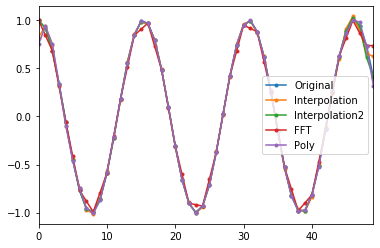

In [5]:
data, timing = resample_all(np.cos(np.linspace(start=0, stop=20, num=50)))
data.iloc[:,:-1].plot(style='.-')

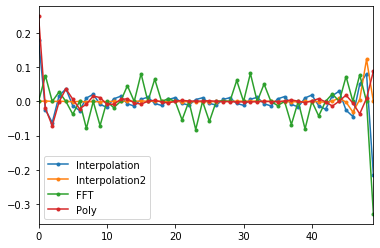

In [6]:
get_difference(data).plot(style='.-')

## Run Test

In [41]:
# This takes some time
timings = []
diffs = []
for length in range(10, 10**5, 10):
    for i in range(20):
        end = np.random.randint(1, 5000)
        data, timing = resample_all(generate_signal(length, end))
        diff = get_difference(data)
        diff = pd.DataFrame(diff.median()).transpose()
        diff["Signal_Length"] = data["Signal_Length"][0]
        diffs += [diff]
        timings += [timing]
timings = pd.concat(timings)
diffs = pd.concat(diffs)

KeyboardInterrupt: 

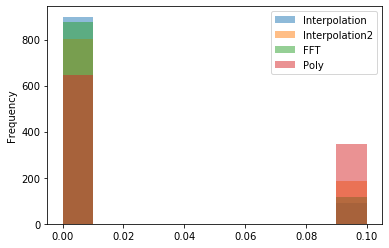

In [32]:
timings.iloc[:,:-1].plot.hist(alpha=0.5)

In [33]:
timings.iloc[:,:-1].describe()

,Interpolation,Interpolation2,FFT,Poly
count,990.000000,990.000000,990.000000,990.000000
mean,0.009168,0.018839,0.011686,0.034756
std,0.028829,0.039059,0.032092,0.047547
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.099730
max,0.099802,0.099969,0.099802,0.099874


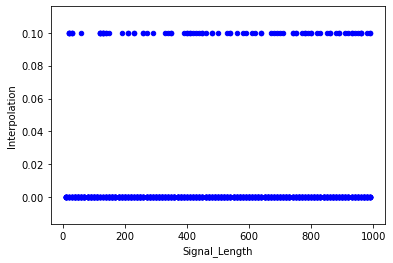

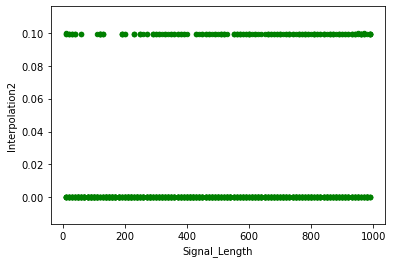

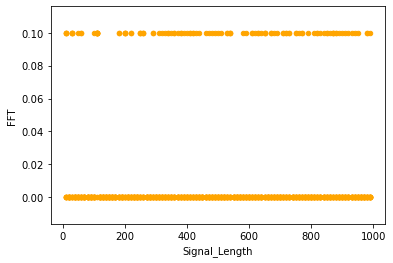

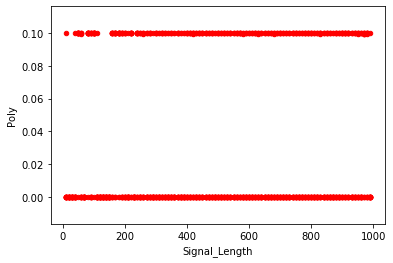

In [34]:
timings.plot.scatter(x='Signal_Length', y='Interpolation', c="blue")
timings.plot.scatter(x='Signal_Length', y='Interpolation2', c="green")
timings.plot.scatter(x='Signal_Length', y='FFT', c="orange")
timings.plot.scatter(x='Signal_Length', y='Poly', c="red")

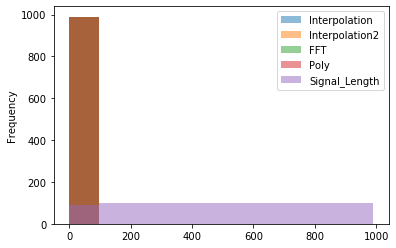

In [35]:
diffs.plot.hist(alpha=0.5)

In [37]:
diffs.describe()

,Interpolation,Interpolation2,FFT,Poly,Signal_Length
count,9.900000e+02,9.900000e+02,990.000000,990.000000,990.000000
mean,8.254485e-04,-1.290441e-03,-0.000577,0.002812,500.000000
std,2.675313e-02,1.374204e-02,0.018169,0.028682,285.918243
min,-4.868560e-01,-1.660648e-01,-0.571675,-0.484272,10.000000
25%,-5.091828e-04,-6.752366e-04,0.000000,-0.000021,250.000000
50%,1.099670e-07,-1.665335e-16,0.000000,0.000012,500.000000
75%,1.540286e-03,1.545280e-05,0.000000,0.003585,750.000000
max,2.344210e-01,1.038215e-01,0.000000,0.304706,990.000000


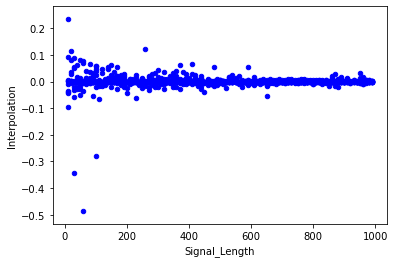

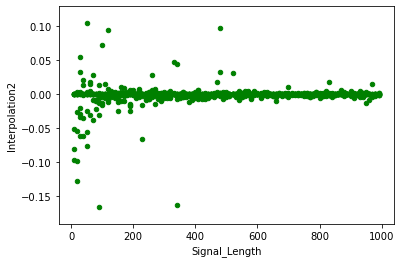

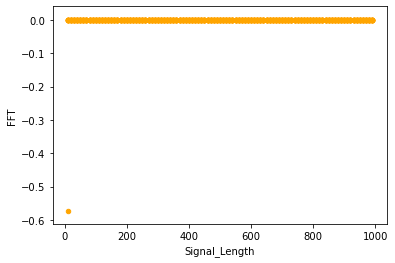

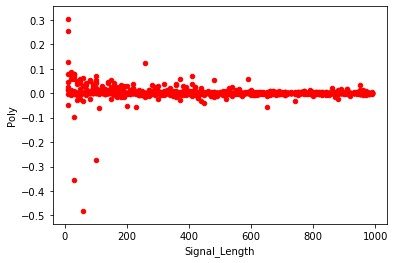

In [40]:
diffs.plot.scatter(x='Signal_Length', y='Interpolation', c="blue")
diffs.plot.scatter(x='Signal_Length', y='Interpolation2', c="green")
diffs.plot.scatter(x='Signal_Length', y='FFT', c="orange")
diffs.plot.scatter(x='Signal_Length', y='Poly', c="red")